In [3]:
# Importing Libraries

import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

# Use numpy's trapezoidal integration as a drop-in replacement
def simps(y, x):
    return np.trapz(y, x)


/tmp/ipython-input-11-334442798.py:12: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  rho /= np.trapz(rho, x)


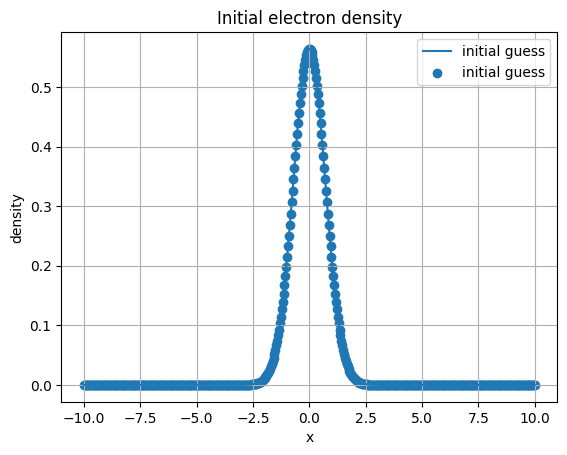

In [11]:
#Step 2: Defining out initial guess

# Define 1D spatial grid

N = 500
x_min, x_max = -10, 10
x = np.linspace(x_min, x_max, N)
dx = x[1] - x[0]

# initial electron density guess (gaussian centered)
rho = np.exp(-x**2)
rho /= np.trapz(rho, x)

#plot the initial guess of density
plt.plot(x, rho, label='initial guess')
plt.scatter(x, rho, label='initial guess')
plt.xlabel('x')
plt.ylabel('density')
plt.title('Initial electron density')
plt.grid(True)
plt.legend()
plt.show()

/tmp/ipython-input-3-2075323787.py:7: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(y, x)


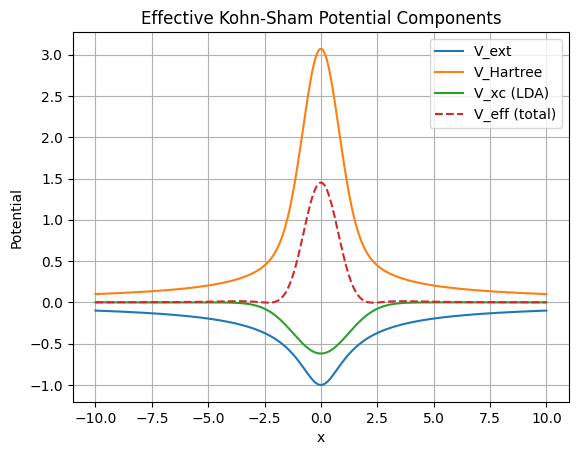

In [12]:
# calculating effective potentiol
# V_eff = V_ext + V_hartree + V_exchange

# External Potentiol
v_ext = -1 / np.sqrt(x**2 + 1)

# Hartree Potentiol
def compute_hartree(rho, x):
  v_h = np.zeros_like(x)
  epsilon = 1e-2
  for i in range(len(x)):
    r = np.sqrt((x[i] - x)**2 + epsilon)
    integrand = rho/r
    v_h[i] = simps(integrand, x)
  return v_h
v_h = compute_hartree(rho, x)

# Exchange correlation Potentiol
c_xc = 0.75
v_xc = - c_xc*rho**(1/3)

# combine all for total effective potentiol
v_eff = v_ext + v_h + v_xc

# Plot all potentials
plt.plot(x, v_ext, label="V_ext")
plt.plot(x, v_h, label="V_Hartree")
plt.plot(x, v_xc, label="V_xc (LDA)")
plt.plot(x, v_eff, label="V_eff (total)", linestyle='--')
plt.xlabel("x")
plt.ylabel("Potential")
plt.title("Effective Kohn-Sham Potential Components")
plt.legend()
plt.grid()
plt.show()

/tmp/ipython-input-3-2075323787.py:7: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(y, x)


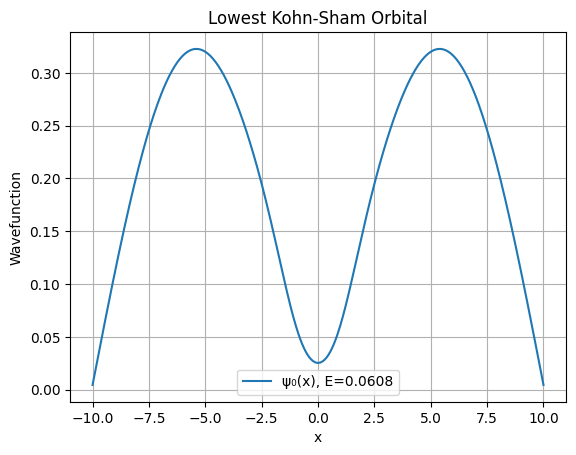

In [13]:
# build the kohn sham hamiltonian and solve it

# discretizing k.e operator using newton's central difference method
kinetic = np.zeros((N, N))
factor = -0.5/dx**2

for i in range(N):
  kinetic[i,i] = -2
  if i > 0:
    kinetic[i, i-1] = 1
  if i <N-1:
    kinetic[i, i+1] = 1

kinetic *= factor

# build the full hamiltonian
hamiltonian = kinetic + np.diag(v_eff)

# diagonalize the hamiltonian to get eigen values and eigen vectors
eigenvalues, eigenfunctions = eigh(hamiltonian)


# use the lowest energy orbitals assuming 1 electron
psi = eigenfunctions[:,0]
energy = eigenvalues[0]

# normalize the wavefunction
psi /= np.sqrt(simps(psi**2, x))

# plot wavefunction
plt.plot(x, psi, label=f"ψ₀(x), E={energy:.4f}")
plt.xlabel("x")
plt.ylabel("Wavefunction")
plt.title("Lowest Kohn-Sham Orbital")
plt.legend()
plt.grid()
plt.show()



In [19]:
# saving initial wavefunction and density
# Save initial density and initial wavefunction (based on initial V_eff)
rho_initial = rho.copy()

v_ext = -1 / np.sqrt(x**2 + 1)
v_h = compute_hartree(rho, x)
v_xc = -c_xc * rho**(1/3)
v_eff = v_ext + v_h + v_xc

hamiltonian = kinetic + np.diag(v_eff)
eigenvalues, eigenfunctions = eigh(hamiltonian)
psi_initial = eigenfunctions[:, 0]
psi_initial /= np.sqrt(simps(psi_initial**2, x))


/tmp/ipython-input-3-2075323787.py:7: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(y, x)


In [22]:
rho_initial = rho.copy()


# Parameters
max_iter = 100
tolerance = 1e-5
alpha = 0.3  # mixing factor

for it in range(max_iter):
    # Compute V_eff
    v_ext = -1 / np.sqrt(x**2 + 1)
    v_h = compute_hartree(rho, x)
    v_xc = -c_xc * rho**(1/3)
    v_eff = v_ext + v_h + v_xc

    # Build Hamiltonian and solve
    hamiltonian = kinetic + np.diag(v_eff)
    eigenvalues, eigenfunctions = eigh(hamiltonian)
    psi = eigenfunctions[:, 0]
    psi /= np.sqrt(simps(psi**2, x))

    # New density
    rho_new = psi**2

    # Convergence check
    delta = np.linalg.norm(rho_new - rho)
    print(f"Iteration {it+1}, Δρ = {delta:.6f}")

    if delta < tolerance:
        print("SCF converged!")
        break

    # Mix densities
    rho = alpha * rho_new + (1 - alpha) * rho


/tmp/ipython-input-3-2075323787.py:7: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(y, x)


Iteration 1, Δρ = 0.877221
Iteration 2, Δρ = 0.877221
Iteration 3, Δρ = 0.877221
Iteration 4, Δρ = 0.877221
Iteration 5, Δρ = 0.877221
Iteration 6, Δρ = 0.877221
Iteration 7, Δρ = 0.877221
Iteration 8, Δρ = 0.877221
Iteration 9, Δρ = 0.877221


/tmp/ipython-input-3-2075323787.py:7: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(y, x)


Iteration 10, Δρ = 0.877221
Iteration 11, Δρ = 0.877221
Iteration 12, Δρ = 0.877221
Iteration 13, Δρ = 0.877221
Iteration 14, Δρ = 0.877221
Iteration 15, Δρ = 0.877221
Iteration 16, Δρ = 0.877221
Iteration 17, Δρ = 0.877221
Iteration 18, Δρ = 0.877221
Iteration 19, Δρ = 0.877221
Iteration 20, Δρ = 0.877221
Iteration 21, Δρ = 0.877221
Iteration 22, Δρ = 0.877221
Iteration 23, Δρ = 0.877221
Iteration 24, Δρ = 0.877221
Iteration 25, Δρ = 0.877221
Iteration 26, Δρ = 0.877221
Iteration 27, Δρ = 0.877221
Iteration 28, Δρ = 0.877221
Iteration 29, Δρ = 0.877221
Iteration 30, Δρ = 0.877221
Iteration 31, Δρ = 0.877221
Iteration 32, Δρ = 0.877221
Iteration 33, Δρ = 0.877221
Iteration 34, Δρ = 0.877221
Iteration 35, Δρ = 0.877221
Iteration 36, Δρ = 0.877221
Iteration 37, Δρ = 0.877221


/tmp/ipython-input-3-2075323787.py:7: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(y, x)


Iteration 38, Δρ = 0.877221
Iteration 39, Δρ = 0.877221
Iteration 40, Δρ = 0.877221
Iteration 41, Δρ = 0.877221
Iteration 42, Δρ = 0.877221
Iteration 43, Δρ = 0.877221
Iteration 44, Δρ = 0.877221
Iteration 45, Δρ = 0.877221
Iteration 46, Δρ = 0.877221
Iteration 47, Δρ = 0.877221
Iteration 48, Δρ = 0.877221
Iteration 49, Δρ = 0.877221
Iteration 50, Δρ = 0.877221
Iteration 51, Δρ = 0.877221
Iteration 52, Δρ = 0.877221
Iteration 53, Δρ = 0.877221
Iteration 54, Δρ = 0.877221
Iteration 55, Δρ = 0.877221
Iteration 56, Δρ = 0.877221
Iteration 57, Δρ = 0.877221
Iteration 58, Δρ = 0.877221
Iteration 59, Δρ = 0.877221
Iteration 60, Δρ = 0.877221
Iteration 61, Δρ = 0.877221
Iteration 62, Δρ = 0.877221
Iteration 63, Δρ = 0.877221
Iteration 64, Δρ = 0.877221
Iteration 65, Δρ = 0.877221
Iteration 66, Δρ = 0.877221
Iteration 67, Δρ = 0.877221
Iteration 68, Δρ = 0.877221
Iteration 69, Δρ = 0.877221
Iteration 70, Δρ = 0.877221
Iteration 71, Δρ = 0.877221
Iteration 72, Δρ = 0.877221
Iteration 73, Δρ = 0

/tmp/ipython-input-3-2075323787.py:7: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(y, x)


Iteration 79, Δρ = 0.877221
Iteration 80, Δρ = 0.877221
Iteration 81, Δρ = 0.877221
Iteration 82, Δρ = 0.877221
Iteration 83, Δρ = 0.877221
Iteration 84, Δρ = 0.877221
Iteration 85, Δρ = 0.877221
Iteration 86, Δρ = 0.877221
Iteration 87, Δρ = 0.877221
Iteration 88, Δρ = 0.877221
Iteration 89, Δρ = 0.877221
Iteration 90, Δρ = 0.877221
Iteration 91, Δρ = 0.877221
Iteration 92, Δρ = 0.877221
Iteration 93, Δρ = 0.877221
Iteration 94, Δρ = 0.877221
Iteration 95, Δρ = 0.877221
Iteration 96, Δρ = 0.877221
Iteration 97, Δρ = 0.877221
Iteration 98, Δρ = 0.877221
Iteration 99, Δρ = 0.877221
Iteration 100, Δρ = 0.877221


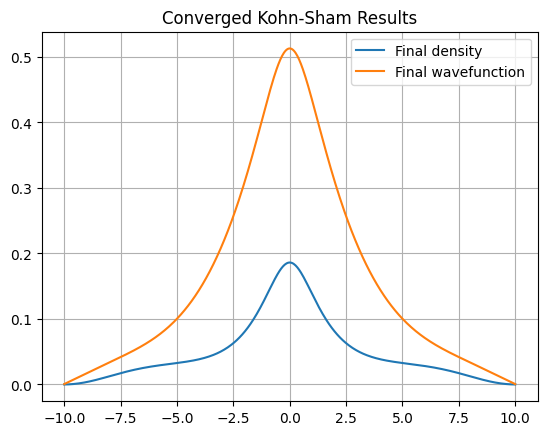

In [18]:
plt.plot(x, rho, label='Final density')
plt.plot(x, psi, label='Final wavefunction')
plt.legend()
plt.title("Converged Kohn-Sham Results")
plt.grid()
plt.show()


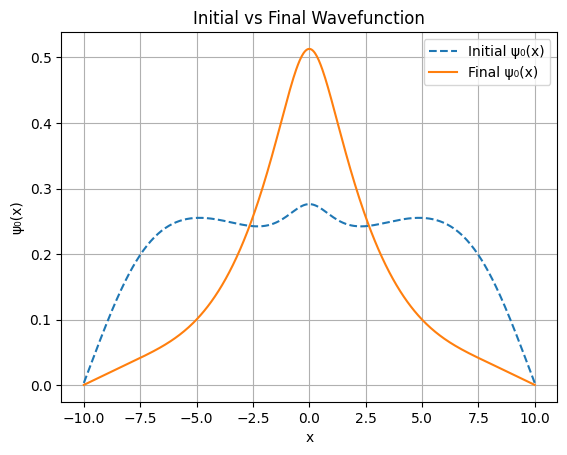

In [20]:
plt.plot(x, psi_initial, label="Initial ψ₀(x)", linestyle='--')
plt.plot(x, psi, label="Final ψ₀(x)", linestyle='-')
plt.title("Initial vs Final Wavefunction")
plt.xlabel("x")
plt.ylabel("ψ₀(x)")
plt.legend()
plt.grid()
plt.show()


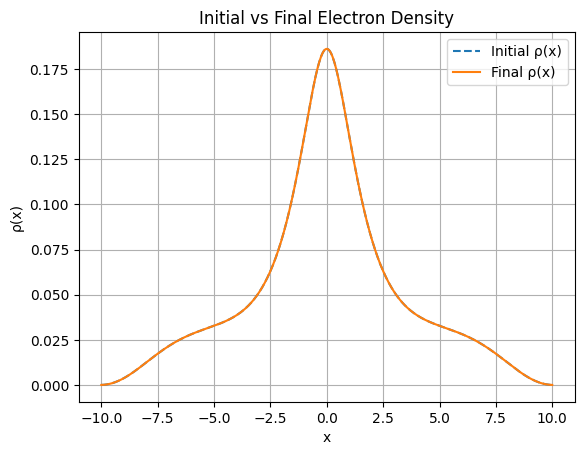

In [23]:
plt.plot(x, rho_initial, label="Initial ρ(x)", linestyle='--')
plt.plot(x, rho, label="Final ρ(x)", linestyle='-')
plt.title("Initial vs Final Electron Density")
plt.xlabel("x")
plt.ylabel("ρ(x)")
plt.legend()
plt.grid()
plt.show()
